<a href="https://colab.research.google.com/github/alekhyaachanta/DataVizFall2020_Colab/blob/master/Class_Activity_Lec03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize New York times database for COVID-19
## Case study Bristol and Suffolk, MA

## Loading US County Level Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
## loading data into dataframe
df = pd.read_csv(db)


# Explore data

In [5]:
df.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [6]:
df.nunique()

date        234
county     1923
state        55
fips       3205
cases     16026
deaths     2381
dtype: int64

In [7]:
# let us get fips for 2 counties  (Bristol and Suffolk, MA)
## fips stands for : Federal Information Processing Standards
Bristol_fips = int(df[(df['county']=='Bristol')&(df['state']=='Massachusetts')]['fips'].unique())
Suffolk_fips = int(df[(df['county']=='Suffolk')&(df['state']=='Massachusetts')]['fips'].unique())
print('Bristol_fips=',Bristol_fips)
print('Suffolk_fips=',Suffolk_fips)

Bristol_fips= 25005
Suffolk_fips= 25025


In [8]:
  def get_county_stat(df,fips):
    return df[['date','county','state','cases','deaths']][(df['fips']==fips)].set_index('date')
  get_county_stat(df,Bristol_fips).head()

,county,state,cases,deaths
date,,,,
2020-03-14,Bristol,Massachusetts,1,0
2020-03-15,Bristol,Massachusetts,1,0
2020-03-16,Bristol,Massachusetts,2,0
2020-03-17,Bristol,Massachusetts,5,0
2020-03-18,Bristol,Massachusetts,5,0


## Explore data type

In [9]:
df_Bristol = get_county_stat(df,25005)
df_Suffolk = get_county_stat(df,25025)

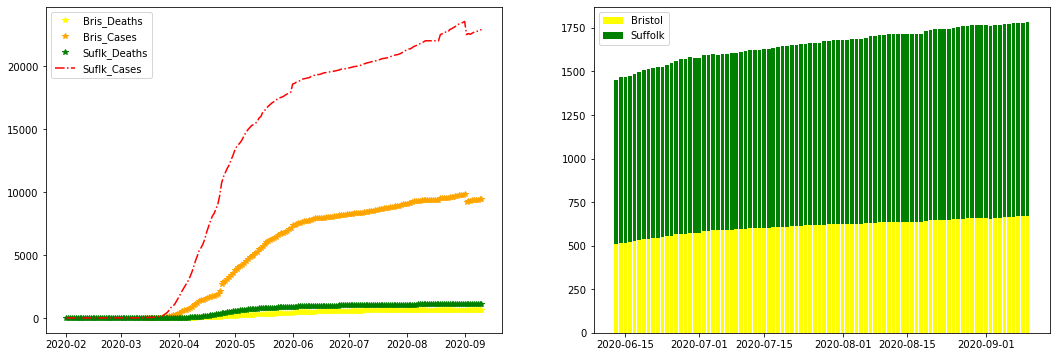

In [15]:
f,ax = plt.subplots(1,2,figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(pd.to_datetime(df_Bristol.index.values),df_Bristol['deaths'].values,'*',label='Bris_Deaths', color='yellow')
plt.plot(pd.to_datetime(df_Bristol.index.values),df_Bristol['cases'].values,'*',label='Bris_Cases',color='orange')
plt.plot(pd.to_datetime(df_Suffolk.index.values),df_Suffolk['deaths'].values,'*',label='Suflk_Deaths',color='green')
plt.plot(pd.to_datetime(df_Suffolk.index.values),df_Suffolk['cases'].values,'-.',label='Suflk_Cases',color='red')
plt.legend(loc=2)
plt.subplot(1,2,2)
plt.bar(pd.to_datetime(df_Bristol.index.values[-90:]),df_Bristol.deaths[-90:],label='Bristol',color='yellow')
plt.bar(pd.to_datetime(df_Suffolk.index.values[-90:]),df_Suffolk.deaths[-90:],label='Suffolk',bottom=df_Bristol.deaths[-90:],color='green')
plt.legend(loc=2)



## Top 10 counties by number of cases and deaths 







In [18]:
x = df.groupby(['county','state']).sum().reset_index()
y = x.sort_values(by = ['deaths','fips'],ascending = False)[['county','state','cases','deaths']]
y.head(10)


,county,state,cases,deaths
2106,New York City,New York,32932301,3269101
647,Cook,Illinois,12938461,585006
1748,Los Angeles,California,17648775,503886
3110,Wayne,Michigan,3607482,378835
2085,Nassau,New York,6377861,369712
2771,Suffolk,New York,6234841,278679
907,Essex,New Jersey,2748862,269007
201,Bergen,New Jersey,2947607,260131
1951,Middlesex,Massachusetts,3355642,246656
3139,Westchester,New York,5311253,217049


## Death rate Per FIPS 

In [21]:
df['DailyCases'] = df.groupby('fips')['cases'].diff().fillna(0)
df['DailyCases'] = df['DailyCases'].rolling(window =3).max()
df['DeathCases'] = df.groupby('fips')['deaths'].diff().fillna(0)
df['DeathCases'] = df['DeathCases'].rolling(window =3).max()
x = df.groupby(['fips','county'], as_index = False).sum()
x['DeathRate'] = x['DeathCases']/x['DailyCases']*100
x[['fips','DeathRate']]

,fips,DeathRate
0,1001.0,2.007528
1,1003.0,1.351616
2,1005.0,1.410658
3,1007.0,1.118568
4,1009.0,1.366607
...,...,...
3200,72151.0,0.000000
3201,72153.0,0.000000
3202,78010.0,1.757812
3203,78020.0,1.716738


## <font color = red> Bonus Point</font>

### A function that makes "Folium Choropleth Map" for Weekly Cases, Weekly Deaths and Weekly Mortality Rate </font>

ALL COUNTIES

<br>

### def Folium_Choropleth(type = 'cases',date=''):

<br>

## Due for Bonus point : Friday (09/11/2020 11:59pm)